# Statistical Machine Learning Approaches


### Group Project - Claire Hutin, Andrés Olivera, Eduardo Razo

In [1]:
Sys.setenv(LANG = "en")

# Data processing library
library(data.table)       # Data manipulation
library(plyr)             # Data manipulation
library(stringr)          # String, text processing
library(vita)             # Quickly check variable importance
library(dataPreparation)  # Data preparation library
library(woeBinning)       # Decision tree–based binning for numerical and categorical variables
library(Boruta)           # Variable selection
library(ggplot2)
library(e1071)
library(dplyr)
library(varhandle)
library(tidyverse)
library(ISLR)
library(leaps)
library(mlr)
library(kernlab)
library(dummies)
library(knitr)
library(corrplot)
library(gridExtra)
library(scales)
library(Rmisc)
library(ggrepel)
library(psych)
# Machine learning library
library(mlr)          # Machine learning framework
library(caret)         # Data processing and machine learning framework
library(MASS)          # LDA
library(randomForest)  # RF
library(gbm)           # Boosting Tree
library(xgboost)       # XGboost


Warning message:
"package 'vita' was built under R version 3.6.3"Warning message:
"package 'dataPreparation' was built under R version 3.6.3"Loading required package: lubridate
Warning message:
"package 'lubridate' was built under R version 3.6.2"
Attaching package: 'lubridate'

The following object is masked from 'package:plyr':

    here

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from 'package:base':

    date

Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loading required package: progress
Warning message:
"package 'progress' was built under R version 3.6.2"dataPreparation 0.4.3
Type dataPrepNews() to see new features/changes/bug fixes.
Warning message:
"package 'Boruta' was built under R version 3.6.3"Loading required package: ranger
Warning message:
"package 'ranger' was built under R version 3.

In [151]:
data = "C:/Users/razow/Desktop/IESEG Subjects/11 Statistical and machine learning approaches/Group Project - Machine Learning/house-prices-advanced-regression-techniques/"
### Separating Variables
train = read.csv(paste(data,"train.csv", sep =""), stringsAsFactors = FALSE)
test = read.csv(paste(data,"test.csv", sep =""), stringsAsFactors = FALSE)

In [152]:
# Dimensions of the data set
dim(train)
dim(test)

[1] 1460   81

[1] 1459   80

In [153]:
head(train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>
1,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
2,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
3,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
4,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000
6,6,50,RL,85,14115,Pave,NA,IR1,Lvl,AllPub,...,0,NA,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [154]:
str(train)

'data.frame':	1460 obs. of  81 variables:
 $ Id           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ MSZoning     : chr  "RL" "RL" "RL" "RL" ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  NA NA NA NA ...
 $ LotShape     : chr  "Reg" "Reg" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "FR2" "Inside" "Corner" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "CollgCr" "Veenker" "CollgCr" "Crawfor" ...
 $ Condition1   : chr  "Norm" "Feedr" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "2Story" "1Story" "2Story" "2Story" ...


In [155]:
# Save ID column from both sets
train_ID <- train$Id
test_ID <- test$Id

# Add SalePrice to test set
test$SalePrice <- NA

In [157]:
colnames(train)

[1] "Id"            "MSSubClass"    "MSZoning"      "LotFrontage"  
 [5] "LotArea"       "Street"        "Alley"         "LotShape"     
 [9] "LandContour"   "Utilities"     "LotConfig"     "LandSlope"    
[13] "Neighborhood"  "Condition1"    "Condition2"    "BldgType"     
[17] "HouseStyle"    "OverallQual"   "OverallCond"   "YearBuilt"    
[21] "YearRemodAdd"  "RoofStyle"     "RoofMatl"      "Exterior1st"  
[25] "Exterior2nd"   "MasVnrType"    "MasVnrArea"    "ExterQual"    
[29] "ExterCond"     "Foundation"    "BsmtQual"      "BsmtCond"     
[33] "BsmtExposure"  "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2" 
[37] "BsmtFinSF2"    "BsmtUnfSF"     "TotalBsmtSF"   "Heating"      
[41] "HeatingQC"     "CentralAir"    "Electrical"    "X1stFlrSF"    
[45] "X2ndFlrSF"     "LowQualFinSF"  "GrLivArea"     "BsmtFullBath" 
[49] "BsmtHalfBath"  "FullBath"      "HalfBath"      "BedroomAbvGr" 
[53] "KitchenAbvGr"  "KitchenQual"   "TotRmsAbvGrd"  "Functional"   
[57] "Fireplaces"    "FireplaceQu"   "GarageType"    "GarageYrBlt"  
[61] "GarageFinish"  "GarageCars"    "GarageArea"    "GarageQual"   
[65] "GarageCond"    "PavedDrive"    "WoodDeckSF"    "OpenPorchSF"  
[69] "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"   "PoolArea"     
[73] "PoolQC"        "Fence"         "MiscFeature"   "MiscVal"      
[77] "MoSold"        "YrSold"        "SaleType"      "SaleCondition"
[81] "SalePrice"

In [158]:
summary(train$SalePrice)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  34900  129975  163000  180921  214000  755000 

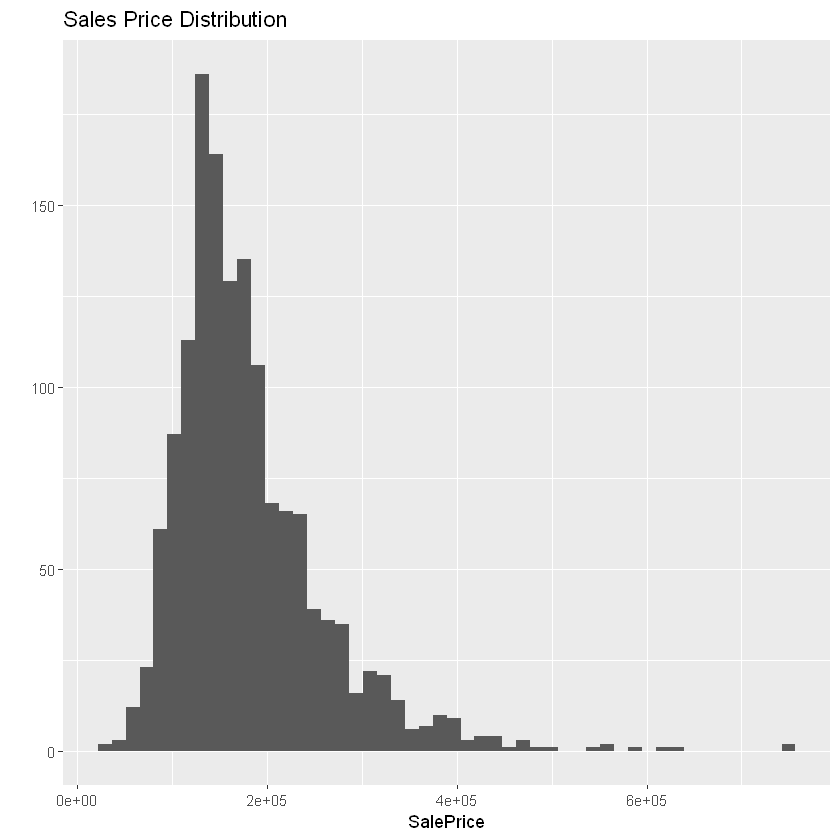

In [159]:
qplot(SalePrice, data = train, bins = 50, main = "Sales Price Distribution")

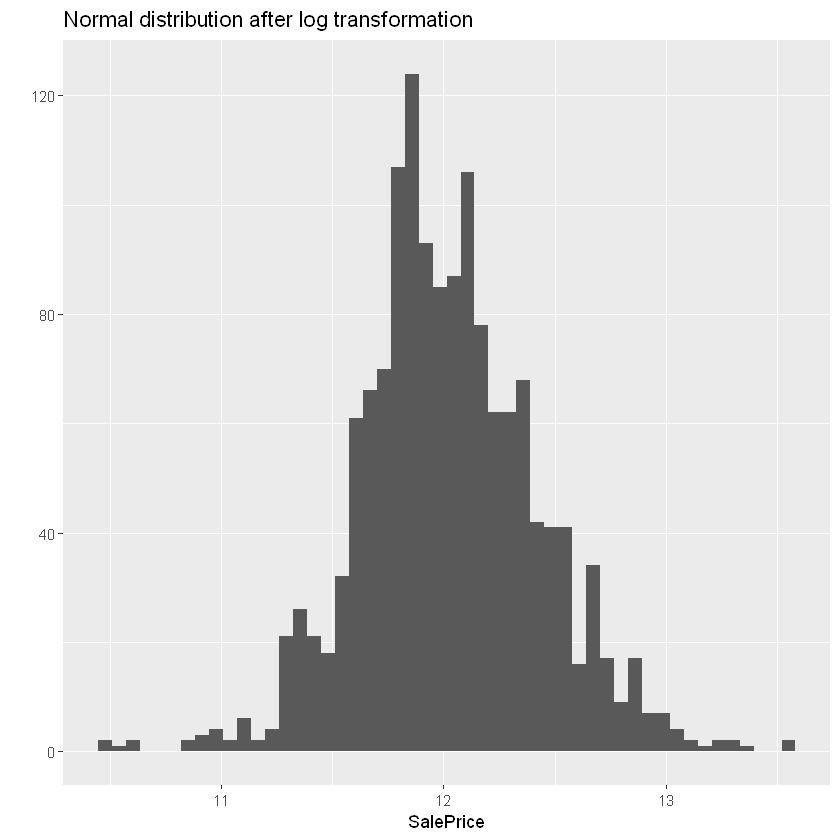

In [160]:
## Log transformation of the target variable
train$SalePrice <- log(train$SalePrice + 1)
test$SalePrice <- log(test$SalePrice + 1)


## Normal distribution after transformation
qplot(SalePrice, data = train, bins = 50, main = "Normal distribution after log transformation")

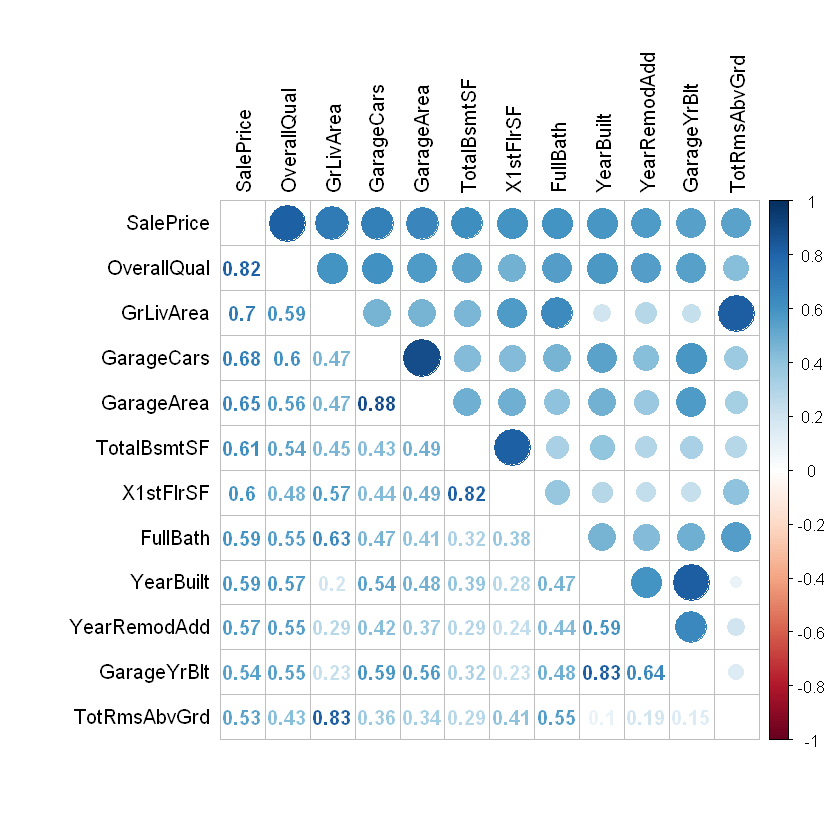

In [161]:
#First glance at the most important numeric variables (correlation with the target variable)
numericVars <- which(sapply(train, is.numeric)) #index vector numeric variables
numericVarNames <- names(numericVars)
all_numVar <- train[, numericVars]
cor_numVar <- cor(all_numVar, use="pairwise.complete.obs")
cor_sorted <- as.matrix(sort(cor_numVar[,'SalePrice'], decreasing = TRUE))
#select only high corelations
CorHigh <- names(which(apply(cor_sorted, 1, function(x) abs(x)>0.5)))
cor_numVar <- cor_numVar[CorHigh, CorHigh]

corrplot.mixed(cor_numVar, tl.col="black", tl.pos = "lt")

In [162]:
# Check missing values
NAcol <- which(colSums(is.na(test)) > 0)
sort(colSums(sapply(test[NAcol], is.na)), decreasing = TRUE)

SalePrice       PoolQC  MiscFeature        Alley        Fence  FireplaceQu 
        1459         1456         1408         1352         1169          730 
 LotFrontage  GarageYrBlt GarageFinish   GarageQual   GarageCond   GarageType 
         227           78           78           78           78           76 
    BsmtCond     BsmtQual BsmtExposure BsmtFinType1 BsmtFinType2   MasVnrType 
          45           44           44           42           42           16 
  MasVnrArea     MSZoning    Utilities BsmtFullBath BsmtHalfBath   Functional 
          15            4            2            2            2            2 
 Exterior1st  Exterior2nd   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF 
           1            1            1            1            1            1 
 KitchenQual   GarageCars   GarageArea     SaleType 
           1            1            1            1

In [163]:
# Check missing values
NAcol <- which(colSums(is.na(train)) > 0)
sort(colSums(sapply(train[NAcol], is.na)), decreasing = TRUE)

PoolQC  MiscFeature        Alley        Fence  FireplaceQu  LotFrontage 
        1453         1406         1369         1179          690          259 
  GarageType  GarageYrBlt GarageFinish   GarageQual   GarageCond BsmtExposure 
          81           81           81           81           81           38 
BsmtFinType2     BsmtQual     BsmtCond BsmtFinType1   MasVnrType   MasVnrArea 
          38           37           37           37            8            8 
  Electrical 
           1

In [164]:
#TRAIN SET
## For some variables, fill NA with 'None'
train[is.na(train[, "Alley"]), "Alley"] = "None"
train[is.na(train[, "PoolQC"]), "PoolQC"] = "None"
train[is.na(train[, "MiscFeature"]), "MiscFeature"] = "None"
train[is.na(train[, "Fence"]), "Fence"] = "None"
train[is.na(train[, "FireplaceQu"]), "FireplaceQu"] = "None"
train[is.na(train[, "GarageType"]), "GarageType"] = "None"
train[is.na(train[, "GarageFinish"]), "GarageFinish"] = "None"
train[is.na(train[, "GarageQual"]), "GarageQual"] = "None"
train[is.na(train[, "GarageCond"]), "GarageCond"] = "None"
train[is.na(train[, "BsmtQual"]), "BsmtQual"] = "None"
train[is.na(train[, "BsmtCond"]), "BsmtCond"] = "None"
train[is.na(train[, "BsmtExposure"]), "BsmtExposure"] = "None"
train[is.na(train[, "BsmtFinType1"]), "BsmtFinType1"] = "None"
train[is.na(train[, "BsmtFinType2"]), "BsmtFinType2"] = "None"
train[is.na(train[, "MasVnrType"]), "MasVnrType"] = "None"

#TEST SET
## For some variables, fill NA with 'None'
test[is.na(test[, "Alley"]), "Alley"] = "None"
test[is.na(test[, "PoolQC"]), "PoolQC"] = "None"
test[is.na(test[, "MiscFeature"]), "MiscFeature"] = "None"
test[is.na(test[, "Fence"]), "Fence"] = "None"
test[is.na(test[, "FireplaceQu"]), "FireplaceQu"] = "None"
test[is.na(test[, "GarageType"]), "GarageType"] = "None"
test[is.na(test[, "GarageFinish"]), "GarageFinish"] = "None"
test[is.na(test[, "GarageQual"]), "GarageQual"] = "None"
test[is.na(test[, "GarageCond"]), "GarageCond"] = "None"
test[is.na(test[, "BsmtQual"]), "BsmtQual"] = "None"
test[is.na(test[, "BsmtCond"]), "BsmtCond"] = "None"
test[is.na(test[, "BsmtExposure"]), "BsmtExposure"] = "None"
test[is.na(test[, "BsmtFinType1"]), "BsmtFinType1"] = "None"
test[is.na(test[, "BsmtFinType2"]), "BsmtFinType2"] = "None"
test[is.na(test[, "MasVnrType"]), "MasVnrType"] = "None"

In [165]:
str(test)

'data.frame':	1459 obs. of  81 variables:
 $ Id           : int  1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 ...
 $ MSSubClass   : int  20 20 60 60 120 60 20 60 20 20 ...
 $ MSZoning     : chr  "RH" "RL" "RL" "RL" ...
 $ LotFrontage  : int  80 81 74 78 43 75 NA 63 85 70 ...
 $ LotArea      : int  11622 14267 13830 9978 5005 10000 7980 8402 10176 8400 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  "None" "None" "None" "None" ...
 $ LotShape     : chr  "Reg" "IR1" "IR1" "IR1" ...
 $ LandContour  : chr  "Lvl" "Lvl" "Lvl" "Lvl" ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "Corner" "Inside" "Inside" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "NAmes" "NAmes" "Gilbert" "Gilbert" ...
 $ Condition1   : chr  "Feedr" "Norm" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : c

In [166]:
# Group by neighborhood and fill in missing value by the median
# LotFrontage of all the neighborhood
temp = aggregate(LotFrontage ~ Neighborhood, data = train, median)
temp2 = c()
for (str in train$Neighborhood[is.na(train$LotFrontage)]) {
    temp2 = c(temp2, which(temp$Neighborhood == str))
}
train$LotFrontage[is.na(train$LotFrontage)] = temp[temp2, 2]

# Group by neighborhood and fill in missing value by the median
# LotFrontage of all the neighborhood
temp = aggregate(LotFrontage ~ Neighborhood, data = test, median)
temp2 = c()
for (str in test$Neighborhood[is.na(test$LotFrontage)]) {
    temp2 = c(temp2, which(temp$Neighborhood == str))
}
test$LotFrontage[is.na(test$LotFrontage)] = temp[temp2, 2]

In [167]:
## Replacing missing data with 0
for (col in c("GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", 
    "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", 
    "MasVnrArea")) {
    train[is.na(train[, col]), col] = 0
}

## Replacing missing data with 0
for (col in c("GarageYrBlt", "GarageArea", "GarageCars", "BsmtFinSF1", 
    "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath", 
    "MasVnrArea")) {
    test[is.na(test[, col]), col] = 0
}

In [168]:
## Replace missing MSZoning values by 'RL' which is Residential Low Density
train$MSZoning[is.na(train$MSZoning)] = "RL"
test$MSZoning[is.na(test$MSZoning)] = "RL"


## Remove Utilities as it has zero variance
train = train[, -9]
test = test[, -9]

## Replace missing Functional values with 'Typ' which is Typical Functionality
train$Functional[is.na(train$Functional)] = "Typ"
test$Functional[is.na(test$Functional)] = "Typ"

## Replace missing Electrical values with 'SBrkr' which are Standard Circuit Breakers
train$Electrical[is.na(train$Electrical)] = "SBrkr"
test$Electrical[is.na(test$Electrical)] = "SBrkr"

## Replace missing KitchenQual values by 'TA' which is whic is Typical/Average
train$KitchenQual[is.na(train$KitchenQual)] = "TA"
test$KitchenQual[is.na(test$KitchenQual)] = "TA"


## Replace missing SaleType values by 'WD' which is Warranty Deed - Conventional
train$SaleType[is.na(train$SaleType)] = "WD"
test$SaleType[is.na(test$SaleType)] = "WD"


## Replace missing Exterior1st and Exterior2nd values by 'VinylSd' which is Vinyl Siding
train$Exterior1st[is.na(train$Exterior1st)] = "VinylSd"
test$Exterior1st[is.na(test$Exterior1st)] = "VinylSd"

train$Exterior2nd[is.na(train$Exterior2nd)] = "VinylSd"
test$Exterior2nd[is.na(test$Exterior2nd)] = "VinylSd"

In [169]:
# Changins some character variables into integers:
Qualities <- c('None' = 0, 'Po' = 1, 'Fa' = 2, 'TA' = 3, 'Gd' = 4, 'Ex' = 5)
train$PoolQC <- as.integer(revalue(train$PoolQC, Qualities))
test$PoolQC <- as.integer(revalue(test$PoolQC, Qualities))

train$FireplaceQu<-as.integer(revalue(train$FireplaceQu, Qualities))
test$FireplaceQu<-as.integer(revalue(test$FireplaceQu, Qualities))

train$ExterQual<-as.integer(revalue(train$ExterQual, Qualities))
test$ExterQual<-as.integer(revalue(test$ExterQual, Qualities))

train$ExterCond<-as.integer(revalue(train$ExterCond, Qualities))
test$ExterCond<-as.integer(revalue(test$ExterCond, Qualities))

train$GarageQual<-as.integer(revalue(train$GarageQual, Qualities))
test$GarageQual<-as.integer(revalue(test$GarageQual, Qualities))

train$GarageCond<-as.integer(revalue(train$GarageCond, Qualities))
test$GarageCond<-as.integer(revalue(test$GarageCond, Qualities))

train$BsmtQual<-as.integer(revalue(train$BsmtQual, Qualities))
test$BsmtQual<-as.integer(revalue(test$BsmtQual, Qualities))

train$BsmtCond<-as.integer(revalue(train$BsmtCond, Qualities))
test$BsmtCond<-as.integer(revalue(test$BsmtCond, Qualities))

train$KitchenQual<-as.integer(revalue(train$KitchenQual, Qualities))
test$KitchenQual<-as.integer(revalue(test$KitchenQual, Qualities))

Shape <- c('IR3'=0, 'IR2'=1, 'IR1'=2, 'Reg'=3)
train$LotShape<-as.integer(revalue(train$LotShape, Shape))
test$LotShape<-as.integer(revalue(test$LotShape, Shape))

Finish <- c('None'=0, 'Unf'=1, 'RFn'=2, 'Fin'=3)
train$GarageFinish<-as.integer(revalue(train$GarageFinish, Finish))
test$GarageFinish<-as.integer(revalue(test$GarageFinish, Finish))

Exposure <- c('None'=0, 'No'=1, 'Mn'=2, 'Av'=3, 'Gd'=4)
train$BsmtExposure<-as.integer(revalue(train$BsmtExposure, Exposure))
test$BsmtExposure<-as.integer(revalue(test$BsmtExposure, Exposure))

FinType <- c('None'=0, 'Unf'=1, 'LwQ'=2, 'Rec'=3, 'BLQ'=4, 'ALQ'=5, 'GLQ'=6)
train$BsmtFinType1<-as.integer(revalue(train$BsmtFinType1, FinType))
test$BsmtFinType1<-as.integer(revalue(test$BsmtFinType1, FinType))

FinType <- c('None'=0, 'Unf'=1, 'LwQ'=2, 'Rec'=3, 'BLQ'=4, 'ALQ'=5, 'GLQ'=6)
train$BsmtFinType2<-as.integer(revalue(train$BsmtFinType2, FinType))
test$BsmtFinType2<-as.integer(revalue(test$BsmtFinType2, FinType))

Masonry <- c('None'=0, 'BrkCmn'=0, 'BrkFace'=1, 'Stone'=2)
train$MasVnrType<-as.integer(revalue(train$MasVnrType, Masonry))
test$MasVnrType<-as.integer(revalue(test$MasVnrType, Masonry))

Functional <- c('Sal'=0, 'Sev'=1, 'Maj2'=2, 'Maj1'=3, 'Mod'=4, 'Min2'=5, 'Min1'=6, 'Typ'=7)
train$Functional <- as.integer(revalue(train$Functional, Functional))
test$Functional <- as.integer(revalue(test$Functional, Functional))

The following `from` values were not present in `x`: Po, TA
The following `from` values were not present in `x`: Po, Fa, TA
The following `from` values were not present in `x`: None, Po
The following `from` values were not present in `x`: None, Po
The following `from` values were not present in `x`: None
The following `from` values were not present in `x`: None
The following `from` values were not present in `x`: Ex
The following `from` values were not present in `x`: Po
The following `from` values were not present in `x`: Po
The following `from` values were not present in `x`: Ex
The following `from` values were not present in `x`: Ex
The following `from` values were not present in `x`: None, Po
The following `from` values were not present in `x`: None, Po
The following `from` values were not present in `x`: Sal
The following `from` values were not present in `x`: Sal


In [170]:
colSums(is.na(test))

Id    MSSubClass      MSZoning   LotFrontage       LotArea 
            0             0             0             0             0 
       Street         Alley      LotShape     Utilities     LotConfig 
            0             0             0             2             0 
    LandSlope  Neighborhood    Condition1    Condition2      BldgType 
            0             0             0             0             0 
   HouseStyle   OverallQual   OverallCond     YearBuilt  YearRemodAdd 
            0             0             0             0             0 
    RoofStyle      RoofMatl   Exterior1st   Exterior2nd    MasVnrType 
            0             0             0             0             0 
   MasVnrArea     ExterQual     ExterCond    Foundation      BsmtQual 
            0             0             0             0             0 
     BsmtCond  BsmtExposure  BsmtFinType1    BsmtFinSF1  BsmtFinType2 
            0             0             0             0             0 
   BsmtFinSF2     BsmtUnfSF   TotalBsmtSF       Heating     HeatingQC 
            0             0             0             0             0 
   CentralAir    Electrical     X1stFlrSF     X2ndFlrSF  LowQualFinSF 
            0             0             0             0             0 
    GrLivArea  BsmtFullBath  BsmtHalfBath      FullBath      HalfBath 
            0             0             0             0             0 
 BedroomAbvGr  KitchenAbvGr   KitchenQual  TotRmsAbvGrd    Functional 
            0             0             0             0             0 
   Fireplaces   FireplaceQu    GarageType   GarageYrBlt  GarageFinish 
            0             0             0             0             0 
   GarageCars    GarageArea    GarageQual    GarageCond    PavedDrive 
            0             0             0             0             0 
   WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch   ScreenPorch 
            0             0             0             0             0 
     PoolArea        PoolQC         Fence   MiscFeature       MiscVal 
            0             0             0             0             0 
       MoSold        YrSold      SaleType SaleCondition     SalePrice 
            0             0             0             0          1459

In [171]:
# Tranform numerical variables that are categorical
train$MSSubClass = as.character(train$MSSubClass)
train$OverallCond = as.character(train$OverallCond)
train$OverallQual = as.character(train$OverallCond)
train$YrSold = as.character(train$YrSold)
train$MoSold = as.character(train$MoSold)

test$MSSubClass = as.character(test$MSSubClass)
test$OverallCond = as.character(test$OverallCond)
test$OverallQual = as.character(test$OverallCond)
test$YrSold = as.character(test$YrSold)
test$MoSold = as.character(test$MoSold)

In [172]:
str(test)

'data.frame':	1459 obs. of  80 variables:
 $ Id           : int  1461 1462 1463 1464 1465 1466 1467 1468 1469 1470 ...
 $ MSSubClass   : chr  "20" "20" "60" "60" ...
 $ MSZoning     : chr  "RH" "RL" "RL" "RL" ...
 $ LotFrontage  : num  80 81 74 78 43 75 63 63 85 70 ...
 $ LotArea      : int  11622 14267 13830 9978 5005 10000 7980 8402 10176 8400 ...
 $ Street       : chr  "Pave" "Pave" "Pave" "Pave" ...
 $ Alley        : chr  "None" "None" "None" "None" ...
 $ LotShape     : int  3 2 2 2 2 2 2 2 3 3 ...
 $ Utilities    : chr  "AllPub" "AllPub" "AllPub" "AllPub" ...
 $ LotConfig    : chr  "Inside" "Corner" "Inside" "Inside" ...
 $ LandSlope    : chr  "Gtl" "Gtl" "Gtl" "Gtl" ...
 $ Neighborhood : chr  "NAmes" "NAmes" "Gilbert" "Gilbert" ...
 $ Condition1   : chr  "Feedr" "Norm" "Norm" "Norm" ...
 $ Condition2   : chr  "Norm" "Norm" "Norm" "Norm" ...
 $ BldgType     : chr  "1Fam" "1Fam" "1Fam" "1Fam" ...
 $ HouseStyle   : chr  "1Story" "1Story" "2Story" "2Story" ...
 $ OverallQual  : chr 

### Variable Creation

In [173]:
# Total Basement Area
train$TotalSF = as.integer(train$TotalBsmtSF + train$X1stFlrSF + train$X2ndFlrSF)
test$TotalSF = as.integer(test$TotalBsmtSF + test$X1stFlrSF + test$X2ndFlrSF)

In [174]:
# Total Number of Bathrooms
train$TotBathrooms <- as.integer(train$FullBath + (train$HalfBath*0.5) + train$BsmtFullBath + (train$BsmtHalfBath*0.5))
test$TotBathrooms <- as.integer(test$FullBath + (test$HalfBath*0.5) + test$BsmtFullBath + (test$BsmtHalfBath*0.5))

In [175]:
# House Age
train$Remod <- as.integer(ifelse(train$YearBuilt==train$YearRemodAdd, 0, 1)) #0=No Remodeling, 1=Remodeling
test$Remod <- as.integer(ifelse(test$YearBuilt==test$YearRemodAdd, 0, 1)) #0=No Remodeling, 1=Remodeling


In [176]:
# Is the house remodeled?
train$Age <- as.integer(train$YrSold)-train$YearRemodAdd
test$Age <- as.integer(test$YrSold)-test$YearRemodAdd

In [177]:
# Is the house new?
train$IsNew <- as.integer(ifelse(train$YrSold==train$YearBuilt, 1, 0))
test$IsNew <- as.integer(ifelse(test$YrSold==test$YearBuilt, 1, 0))

In [178]:
#Total Area
train$TotalSqFeet <- as.integer(train$GrLivArea + train$TotalBsmtSF)
test$TotalSqFeet <- as.integer(test$GrLivArea + test$TotalBsmtSF)

In [179]:
#Trying to find a way of grouping neighborhoods by SalesPrice
table(test$Neighborhood)


Blmngtn Blueste  BrDale BrkSide ClearCr CollgCr Crawfor Edwards Gilbert  IDOTRR 
     11       8      14      50      16     117      52      94      86      56 
MeadowV Mitchel   NAmes NoRidge NPkVill NridgHt  NWAmes OldTown  Sawyer SawyerW 
     20      65     218      30      14      89      58     126      77      66 
Somerst StoneBr   SWISU  Timber Veenker 
     96      26      23      34      13 

No summary function supplied, defaulting to `mean_se()`


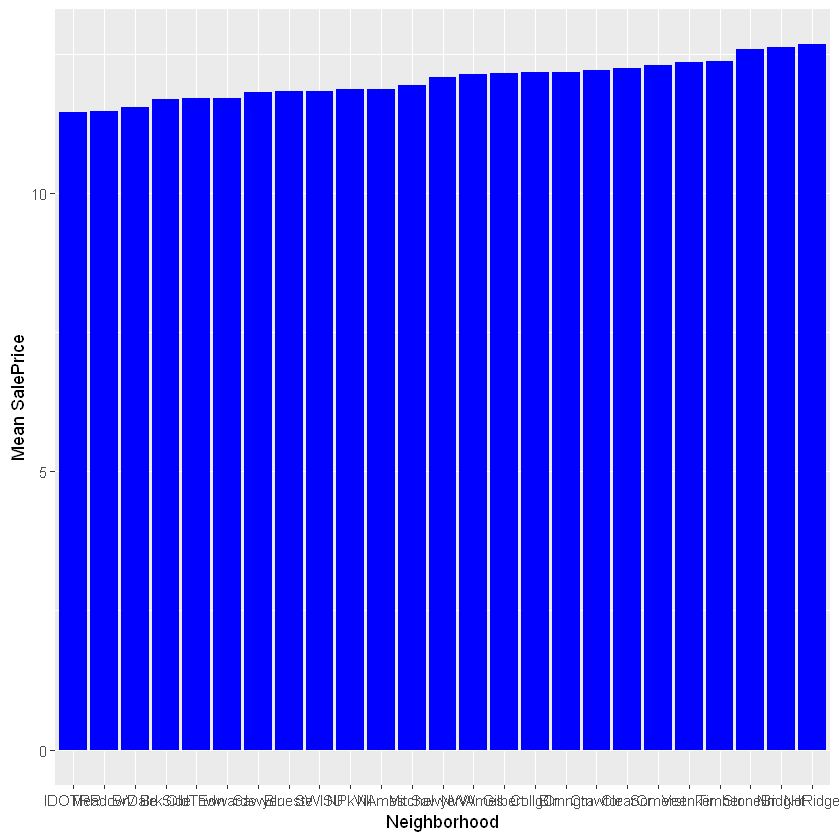

In [180]:
#####" GUYS THIS WE WOULD NEED TO PLOT BEFORE LOGING THE SALESPRICE BECAUSE OTHERWISE WE CANT TELL WHICH GROUPS TO CREATE"

ggplot(train[!is.na(train$SalePrice),], aes(x=reorder(Neighborhood, SalePrice, FUN=mean), y=SalePrice)) +
        geom_bar(stat='summary', fun.y = "mean", fill='blue') + labs(x='Neighborhood', y="Mean SalePrice") 

In [181]:
train$NeighRich[train$Neighborhood %in% c('StoneBr', 'NridgHt', 'NoRidge')] <- 2
train$NeighRich[!train$Neighborhood %in% c('MeadowV', 'IDOTRR', 'BrDale', 'StoneBr', 'NridgHt', 'NoRidge')] <- 1
train$NeighRich[train$Neighborhood %in% c('MeadowV', 'IDOTRR', 'BrDale')] <- 0

test$NeighRich[test$Neighborhood %in% c('StoneBr', 'NridgHt', 'NoRidge')] <- 2
test$NeighRich[!test$Neighborhood %in% c('MeadowV', 'IDOTRR', 'BrDale', 'StoneBr', 'NridgHt', 'NoRidge')] <- 1
test$NeighRich[test$Neighborhood %in% c('MeadowV', 'IDOTRR', 'BrDale')] <- 0

### Dummy Encoding

Get the list of numerical and categorical variables.

In [182]:
# Get the IV and DV list name
# Dependent variable (DV)
dv_list <- c('SalePrice')
# Independent variable (IV)
iv_list <- setdiff(colnames(train), dv_list)  # Exclude the target variable
iv_list <- setdiff(iv_list, 'Id')  # Exclude the client_id

In [183]:
# Pick out categorical, boolean and numerical variable
iv_cat_list <- c()  # List to store categorical variable
iv_bool_list <- c()  # List to store boolean variable
iv_num_list <- c()  # List to store numerical variable
for (v in iv_list) {
    if (class(train[, v]) == 'character') {  # Factor == categorical variable
        iv_cat_list <- c(iv_cat_list, v)
    } else if (class(train[, v]) == 'logical') {  # Logical == boolean variable
        iv_bool_list <- c(iv_bool_list, v)
    } else {  # Non-factor + Non-logical == numerical variable
        iv_num_list <- c(iv_num_list, v)
    }
}

In [184]:
iv_cat_list
iv_num_list

[1] "MSSubClass"    "MSZoning"      "Street"        "Alley"        
 [5] "Utilities"     "LotConfig"     "LandSlope"     "Neighborhood" 
 [9] "Condition1"    "Condition2"    "BldgType"      "HouseStyle"   
[13] "OverallQual"   "OverallCond"   "RoofStyle"     "RoofMatl"     
[17] "Exterior1st"   "Exterior2nd"   "Foundation"    "Heating"      
[21] "HeatingQC"     "CentralAir"    "Electrical"    "GarageType"   
[25] "PavedDrive"    "Fence"         "MiscFeature"   "MoSold"       
[29] "YrSold"        "SaleType"      "SaleCondition"

[1] "LotFrontage"   "LotArea"       "LotShape"      "YearBuilt"    
 [5] "YearRemodAdd"  "MasVnrType"    "MasVnrArea"    "ExterQual"    
 [9] "ExterCond"     "BsmtQual"      "BsmtCond"      "BsmtExposure" 
[13] "BsmtFinType1"  "BsmtFinSF1"    "BsmtFinType2"  "BsmtFinSF2"   
[17] "BsmtUnfSF"     "TotalBsmtSF"   "X1stFlrSF"     "X2ndFlrSF"    
[21] "LowQualFinSF"  "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath" 
[25] "FullBath"      "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr" 
[29] "KitchenQual"   "TotRmsAbvGrd"  "Functional"    "Fireplaces"   
[33] "FireplaceQu"   "GarageYrBlt"   "GarageFinish"  "GarageCars"   
[37] "GarageArea"    "GarageQual"    "GarageCond"    "WoodDeckSF"   
[41] "OpenPorchSF"   "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"  
[45] "PoolArea"      "PoolQC"        "MiscVal"       "TotalSF"      
[49] "TotBathrooms"  "Remod"         "Age"           "IsNew"        
[53] "TotalSqFeet"   "NeighRich"

#### Transform to dummy variables.

In [201]:
# Join train and test (holdout) to process data
data <- rbind(train, test)  # Combine train and test (holdout) data

# Loop through all categorical variable
# Drop the last column of dummy variable
data_dummy_list <- list()
for (v in iv_cat_list) {
    tmp <- to.dummy(data[, v], v)
    data_dummy_list[[length(data_dummy_list) + 1]] <- tmp[, -ncol(tmp), drop=FALSE]
}
data_dummy <- as.data.frame(do.call(cbind, data_dummy_list))

# Drop categorical variables
data_processed <- data[, setdiff(colnames(data), iv_cat_list)]

# Add dummy vairables
data_processed <- cbind(data_processed, data_dummy)

## Drop Id as it is unnecessary for the prediction process
data_processed = data_processed[, -1]

head(data_processed)

,LotFrontage,LotArea,LotShape,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,ExterCond,BsmtQual,...,SaleType.ConLI,SaleType.ConLw,SaleType.CWD,SaleType.New,SaleType.Oth,SaleCondition.Abnorml,SaleCondition.AdjLand,SaleCondition.Alloca,SaleCondition.Family,SaleCondition.Normal
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,65,8450,3,2003,2003,1,196,4,3,4,...,0,0,0,0,0,0,0,0,0,1
2,80,9600,3,1976,1976,0,0,3,3,4,...,0,0,0,0,0,0,0,0,0,1
3,68,11250,2,2001,2002,1,162,4,3,4,...,0,0,0,0,0,0,0,0,0,1
4,60,9550,2,1915,1970,0,0,3,3,3,...,0,0,0,0,0,1,0,0,0,0
5,84,14260,2,2000,2000,1,350,4,3,4,...,0,0,0,0,0,0,0,0,0,1
6,85,14115,2,1993,1995,0,0,3,3,4,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Putting into log variables having a too high skewness

#data_processed$LotFrontage <- log(data_processed$LotFrontage)
#data_processed$LotArea <- log(data_processed$LotArea)
#data_processed$MasVnrArea <- log(data_processed$MasVnrArea)
#data_processed$BsmtFinSF1 <- log(data_processed$BsmtFinSF1)
#data_processed$BsmtFinSF2 <- log(data_processed$BsmtFinSF2)
#data_processed$BsmtUnfSF <- log(data_processed$BsmtUnfSF)
#data_processed$TotalBsmtSF <- log(data_processed$TotalBsmtSF)
#data_processed$X1stFlrSF <- log(data_processed$X1stFlrSF)
#data_processed$X2ndFlrSF <- log(data_processed$X2ndFlrSF)
#data_processed$GrLivArea <- log(data_processed$GrLivArea)
#data_processed$WoodDeckS <- log(data_processed$WoodDeckS)
#data_processed$ScreenPorch <- log(data_processed$ScreenPorch)
#data_processed$MiscVal <- log(data_processed$MiscVal)
#data_processed$TotalSF <- log(data_processed$TotalSF)
#data_processed$TotalSqFeet <- log(data_processed$TotalSqFeet)

In [203]:
# Split train and test
train_processed <- data_processed[!is.na(data_processed$SalePrice), ]
test_processed <- data_processed[is.na(data_processed$SalePrice), ]

In [204]:
# Dropping SalePrice from test_processed
test_processed$SalePrice <- NULL

In [205]:
# Dimensions of the data set
dim(train_processed)
dim(test_processed)

[1] 1460  255

[1] 1459  254

In [206]:
# Applying R name conventions
colnames(train_processed) <- make.names(colnames(train_processed),unique = T)
colnames(test_processed) <- make.names(colnames(test_processed),unique = T)

## Feature Selection and Dimension Reduction

In [207]:
set.seed(1)
boruta_output <- Boruta(SalePrice ~ ., data=train_processed, doTrace=0)

In [208]:
names(boruta_output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [209]:
Confirmed = boruta_output$finalDecision == "Confirmed"
Confirmed = boruta_output$finalDecision[Confirmed]
names(Confirmed)
length(Confirmed)

[1] "LotFrontage"          "LotArea"              "LotShape"            
 [4] "YearBuilt"            "YearRemodAdd"         "MasVnrType"          
 [7] "MasVnrArea"           "ExterQual"            "BsmtQual"            
[10] "BsmtCond"             "BsmtExposure"         "BsmtFinType1"        
[13] "BsmtFinSF1"           "BsmtUnfSF"            "TotalBsmtSF"         
[16] "X1stFlrSF"            "X2ndFlrSF"            "GrLivArea"           
[19] "BsmtFullBath"         "FullBath"             "HalfBath"            
[22] "BedroomAbvGr"         "KitchenAbvGr"         "KitchenQual"         
[25] "TotRmsAbvGrd"         "Functional"           "Fireplaces"          
[28] "FireplaceQu"          "GarageYrBlt"          "GarageFinish"        
[31] "GarageCars"           "GarageArea"           "GarageQual"          
[34] "GarageCond"           "WoodDeckSF"           "OpenPorchSF"         
[37] "TotalSF"              "TotBathrooms"         "Age"                 
[40] "TotalSqFeet"          "NeighRich"            "MSSubClass.120"      
[43] "MSSubClass.160"       "MSSubClass.20"        "MSSubClass.30"       
[46] "MSSubClass.60"        "MSZoning.C"           "MSZoning.FV"         
[49] "MSZoning.RL"          "Neighborhood.CollgCr" "Neighborhood.Crawfor"
[52] "Neighborhood.Edwards" "Neighborhood.Gilbert" "Neighborhood.MeadowV"
[55] "Neighborhood.NAmes"   "Neighborhood.NridgHt" "Neighborhood.OldTown"
[58] "Neighborhood.Somerst" "BldgType.1Fam"        "BldgType.Duplex"     
[61] "BldgType.Twnhs"       "HouseStyle.1Story"    "HouseStyle.2Story"   
[64] "OverallQual.3"        "OverallQual.4"        "OverallQual.5"       
[67] "OverallQual.6"        "OverallQual.7"        "OverallCond.3"       
[70] "OverallCond.4"        "OverallCond.5"        "OverallCond.6"       
[73] "OverallCond.7"        "RoofStyle.Gable"      "RoofStyle.Hip"       
[76] "Exterior1st.CemntBd"  "Exterior1st.VinylSd"  "Exterior2nd.CmentBd" 
[79] "Exterior2nd.VinylSd"  "Foundation.CBlock"    "Foundation.PConc"    
[82] "HeatingQC.Ex"         "CentralAir.N"         "GarageType.Attchd"   
[85] "GarageType.Detchd"    "PavedDrive.N"

[1] 86

In [210]:
Notsure = boruta_output$finalDecision == "Tentative"
Notsure = boruta_output$finalDecision[Notsure]
names(Notsure)
length(Notsure)

[1] "BsmtFinType2"         "ScreenPorch"          "Remod"               
 [4] "MSSubClass.180"       "MSSubClass.50"        "MSSubClass.80"       
 [7] "Neighborhood.ClearCr" "Neighborhood.NoRidge" "Neighborhood.NWAmes" 
[10] "Neighborhood.Sawyer"  "Condition1.Norm"      "HouseStyle.1.5Fin"   
[13] "Exterior1st.HdBoard"  "Exterior1st.MetalSd"  "Exterior2nd.MetalSd" 
[16] "Foundation.BrkTil"    "GarageType.BuiltIn"   "SaleType.New"        
[19] "SaleCondition.Normal"

[1] 19

In [211]:
# Do a tentative rough fix
roughFixMod <- TentativeRoughFix(boruta_output)
boruta_signif <- getSelectedAttributes(roughFixMod)
print(boruta_signif)

  [1] "LotFrontage"          "LotArea"              "LotShape"            
  [4] "YearBuilt"            "YearRemodAdd"         "MasVnrType"          
  [7] "MasVnrArea"           "ExterQual"            "BsmtQual"            
 [10] "BsmtCond"             "BsmtExposure"         "BsmtFinType1"        
 [13] "BsmtFinSF1"           "BsmtFinType2"         "BsmtUnfSF"           
 [16] "TotalBsmtSF"          "X1stFlrSF"            "X2ndFlrSF"           
 [19] "GrLivArea"            "BsmtFullBath"         "FullBath"            
 [22] "HalfBath"             "BedroomAbvGr"         "KitchenAbvGr"        
 [25] "KitchenQual"          "TotRmsAbvGrd"         "Functional"          
 [28] "Fireplaces"           "FireplaceQu"          "GarageYrBlt"         
 [31] "GarageFinish"         "GarageCars"           "GarageArea"          
 [34] "GarageQual"           "GarageCond"           "WoodDeckSF"          
 [37] "OpenPorchSF"          "TotalSF"              "TotBathrooms"        
 [40] "Remod"            

In [212]:
train_final = train_processed[,names(train_processed) %in% boruta_signif]
train_final$Id = train_ID
train_final$SalePrice = train_processed$SalePrice
dim(train_final)

[1] 1460  106

In [213]:
str(train_final, list.len=ncol(train_final))

'data.frame':	1460 obs. of  106 variables:
 $ LotFrontage         : num  65 80 68 60 84 85 75 80 51 50 ...
 $ LotArea             : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ LotShape            : int  3 3 2 2 2 2 3 2 3 3 ...
 $ YearBuilt           : int  2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 ...
 $ YearRemodAdd        : int  2003 1976 2002 1970 2000 1995 2005 1973 1950 1950 ...
 $ MasVnrType          : int  1 0 1 0 1 0 2 2 0 0 ...
 $ MasVnrArea          : num  196 0 162 0 350 0 186 240 0 0 ...
 $ ExterQual           : int  4 3 4 3 4 3 4 3 3 3 ...
 $ BsmtQual            : int  4 4 4 3 4 4 5 4 3 3 ...
 $ BsmtCond            : int  3 3 3 4 3 3 3 3 3 3 ...
 $ BsmtExposure        : int  1 4 2 1 3 1 3 2 1 1 ...
 $ BsmtFinType1        : int  6 5 6 5 6 6 6 5 1 6 ...
 $ BsmtFinSF1          : num  706 978 486 216 655 ...
 $ BsmtFinType2        : int  1 1 1 1 1 1 1 4 1 1 ...
 $ BsmtUnfSF           : num  150 284 434 540 490 64 317 216 952 140 ...
 $ TotalBsmtS

In [214]:
test_final = test_processed[,names(test_processed) %in% boruta_signif]
test_final$Id = test_ID
dim(test_final)

[1] 1459  105

In [215]:
str(test_final, list.len=ncol(test_final))

'data.frame':	1459 obs. of  105 variables:
 $ LotFrontage         : num  80 81 74 78 43 75 63 63 85 70 ...
 $ LotArea             : int  11622 14267 13830 9978 5005 10000 7980 8402 10176 8400 ...
 $ LotShape            : int  3 2 2 2 2 2 2 2 3 3 ...
 $ YearBuilt           : int  1961 1958 1997 1998 1992 1993 1992 1998 1990 1970 ...
 $ YearRemodAdd        : int  1961 1958 1998 1998 1992 1994 2007 1998 1990 1970 ...
 $ MasVnrType          : int  0 1 0 1 0 0 0 0 0 0 ...
 $ MasVnrArea          : num  0 108 0 20 0 0 0 0 0 0 ...
 $ ExterQual           : int  3 3 3 3 4 3 3 3 3 3 ...
 $ BsmtQual            : int  3 3 4 3 4 4 4 4 4 3 ...
 $ BsmtCond            : int  3 3 3 3 3 3 3 3 3 3 ...
 $ BsmtExposure        : int  1 1 1 1 1 1 1 1 4 1 ...
 $ BsmtFinType1        : int  3 5 6 6 5 1 5 1 6 5 ...
 $ BsmtFinSF1          : num  468 923 791 602 263 0 935 0 637 804 ...
 $ BsmtFinType2        : int  2 1 1 1 1 1 1 1 1 3 ...
 $ BsmtUnfSF           : num  270 406 137 324 1017 ...
 $ TotalBsmtSF        

# Modeling 

### Linear Regression

In [231]:
set.seed(123)
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10, predict="both")

# Define the model
learner <- makeLearner("regr.lm", predict.type="se", fix.factors.prediction=T)

# Define the task
train_task <-  makeRegrTask(id="train_final", data=train_final, target="SalePrice")

# Set hyper parameter tuning
tune_params <- makeParamSet(
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::rmse))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::rmse, setAggregation(mlr::rmse, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

Resampling: cross-validation
Measures:             rmse.train   rmse.test    
[Resample] iter 1:    0.1279379    0.1128825    
[Resample] iter 2:    0.1217398    0.1393786    
[Resample] iter 3:    0.1133463    0.1838751    
[Resample] iter 4:    0.1182736    0.1493223    
[Resample] iter 5:    0.1267495    0.1222177    


Aggregated Result: rmse.test.rmse=0.1436755,rmse.train.mean=0.1216094




In [232]:
best_model <- mlr::train(best_learner, train_task)

In [233]:
pred <- predict(best_model, newdata=test_final)
pred

Prediction: 1459 observations
predict.type: se
threshold: 
time: 0.00
     response         se
1461 11.59769 0.03199470
1462 11.92304 0.02711916
1463 12.08501 0.02466297
1464 12.18067 0.02803503
1465 12.08041 0.02826765
1466 12.02155 0.02377050
... (#rows: 1459, #cols: 2)

In [234]:
# Output predicted file
output_LR <- data.frame(test_final$Id, SalePrice=pred$data$response)

In [235]:
# Extract output
output_LR$SalePrice <- exp(output_LR$SalePrice)
output_LR

test_final.Id,SalePrice
<int>,<dbl>
1461,108845.67
1462,150699.27
1463,177195.32
1464,194983.30
1465,176382.35
1466,166299.60
1467,177116.51
1468,166022.33
1469,180552.05


In [236]:
# Write output
write.csv(output_LR, 'C:/Users/razow/Desktop/IESEG Subjects/11 Statistical and machine learning approaches/Group Project - Machine Learning/output_LR5.csv', row.names=FALSE)

### Random Forest Regression

In [64]:
set.seed(1)
options(warn=-1)

# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=5)

# Define the model
learner <- makeLearner("regr.randomForest", predict.type="response", fix.factors.prediction=T)

# Define the task
train_task <- makeRegrTask(id="train", data=train_processed, target="SalePrice")

# Set hyper parameter tuning
tune_params <- makeParamSet(
    makeIntegerParam("ntree",lower = 60, upper = 300),
    makeIntegerParam("mtry", lower = 3, upper = 10),
    makeIntegerParam("nodesize", lower = 10, upper = 60)
)
ctrl = makeTuneControlRandom(maxit = 100L)

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::rmse))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::rmse))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

[Tune] Started tuning learner regr.randomForest for parameter set:
            Type len Def    Constr Req Tunable Trafo
ntree    integer   -   - 60 to 300   -    TRUE     -
mtry     integer   -   -   3 to 10   -    TRUE     -
nodesize integer   -   -  10 to 60   -    TRUE     -
With control class: TuneControlRandom
Imputation value: Inf
[Tune-x] 1: ntree=71; mtry=5; nodesize=22
[Tune-y] 1: rmse.test.rmse=0.1743770; time: 0.0 min
[Tune-x] 2: ntree=67; mtry=9; nodesize=60
[Tune-y] 2: rmse.test.rmse=0.1723294; time: 0.0 min
[Tune-x] 3: ntree=268; mtry=7; nodesize=15
[Tune-y] 3: rmse.test.rmse=0.1603491; time: 0.1 min
[Tune-x] 4: ntree=236; mtry=9; nodesize=16
[Tune-y] 4: rmse.test.rmse=0.1568063; time: 0.1 min
[Tune-x] 5: ntree=267; mtry=10; nodesize=12
[Tune-y] 5: rmse.test.rmse=0.1538183; time: 0.1 min
[Tune-x] 6: ntree=228; mtry=5; nodesize=18
[Tune-y] 6: rmse.test.rmse=0.1690079; time: 0.0 min
[Tune-x] 7: ntree=191; mtry=6; nodesize=29
[Tune-y] 7: rmse.test.rmse=0.1698441; time: 0.0 m

In [65]:
best_model <- mlr::train(best_learner, train_task)

In [66]:
pred <- predict(best_model, newdata=test_processed)
pred

Prediction: 1459 observations
predict.type: response
threshold: 
time: 0.08
     response
1461 11.62192
1462 11.91885
1463 12.10858
1464 12.12955
1465 12.12133
1466 12.06655
... (#rows: 1459, #cols: 1)

In [73]:
# Output predicted file
output_RF <- data.frame(test_processed$Id, SalePrice=pred$data$response)
#write.csv(output_RF, 'C:/Users/hutin/Desktop/IESEG/MASTER BIG DATA/Statistical Machine Learning/output_RF.csv', row.names=FALSE)

In [74]:
output_RF$SalePrice <- exp(output_RF$SalePrice)
head(output_RF)

,test_processed.Id,SalePrice
,<int>,<dbl>
1,1461,111515.1
2,1462,150068.3
3,1463,181421.0
4,1464,185266.0
5,1465,183750.3
6,1466,173954.9


### XGBOOST

In [75]:
options(warn=-1)
set.seed(1)
# Set up cross-validation

rdesc = makeResampleDesc("CV", iters=100, predict="both")

# Define the model
learner <- makeLearner("regr.xgboost", predict.type = "response")

# Define the task
train_task <- makeRegrTask(id="train", data=train_processed, target="SalePrice")

# Set hyper parameter tuning
tune_params <- makeParamSet(
    makeIntegerParam("nrounds",lower=200,upper=600),
    makeIntegerParam("max_depth",lower=3,upper=20),
    makeNumericParam("lambda",lower=0.00055,upper=0.0060),
    makeNumericParam("gamma",lower=0.5,upper=0.6),
    makeNumericParam("eta", lower = 0.001, upper = 0.5),
    makeNumericParam("subsample", lower = 0.10, upper = 0.80),
    makeNumericParam("min_child_weight",lower=1,upper=5),
    makeNumericParam("colsample_bytree",lower = 0.2,upper = 0.8)
)

ctrl = makeTuneControlRandom(maxit = 20L)

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::rmse))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::rmse, setAggregation(mlr::rmse, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}


[Tune] Started tuning learner regr.xgboost for parameter set:
                    Type len Def       Constr Req Tunable Trafo
nrounds          integer   -   -   200 to 600   -    TRUE     -
max_depth        integer   -   -      3 to 20   -    TRUE     -
lambda           numeric   -   -  0.55 to 0.6   -    TRUE     -
gamma            numeric   -   -   0.5 to 0.6   -    TRUE     -
eta              numeric   -   - 0.001 to 0.5   -    TRUE     -
subsample        numeric   -   -   0.1 to 0.8   -    TRUE     -
min_child_weight numeric   -   -       1 to 5   -    TRUE     -
colsample_bytree numeric   -   -   0.2 to 0.8   -    TRUE     -
With control class: TuneControlRandom
Imputation value: Inf
[Tune-x] 1: nrounds=219; max_depth=7; lambda=0.563; gamma=0.503; eta=0.394; subsample=0.797; min_child_weight=4.46; colsample_bytree=0.566
[Tune-y] 1: rmse.test.rmse=0.1531406; time: 0.5 min
[Tune-x] 2: nrounds=242; max_depth=16; lambda=0.591; gamma=0.512; eta=0.431; subsample=0.732; min_child_weight=

In [82]:
best_model <- mlr::train(best_learner, train_task)

In [83]:
pred <- predict(best_model, newdata=test_processed)
pred

Prediction: 1459 observations
predict.type: response
threshold: 
time: 0.00
     response
1461 3.954851
1462 3.954851
1463 3.954851
1464 3.954851
1465 3.954851
1466 3.954851
... (#rows: 1459, #cols: 1)

In [84]:
# Output predicted file
output_XGB <- data.frame(test_processed$Id, SalePrice=pred$data$response)
#write.csv(output_LR, 'data = "C:/Users/hutin/Desktop/IESEG/MASTER BIG DATA/Statistical Machine Learning/house-prices-advanced-regression-techniques/"
#output_XGBOOST.csv', row.names=FALSE)

In [85]:
output_XGB$SalePrice <- exp(output_XGB$SalePrice)
head(output_XGB)

,test_processed.Id,SalePrice
,<int>,<dbl>
1,1461,52.18791
2,1462,52.18791
3,1463,52.18791
4,1464,52.18791
5,1465,52.18791
6,1466,52.18791


### Lasso

In [248]:
set.seed(123)
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=100, predict="both")

# Define the model
learner <- makeLearner("regr.glmnet", alpha=1, id="lasso", fix.factors.prediction=T)

# Define the task
train_task <-  makeRegrTask(id="train_processed", data=train_processed, target="SalePrice")

# Set hyper parameter tuning
tune_params <- makeParamSet(
    makeNumericParam("s", lower = 0, upper = 15)        
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::rmse))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::rmse, setAggregation(mlr::rmse, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

[Tune] Started tuning learner lasso for parameter set:
     Type len Def  Constr Req Tunable Trafo
s numeric   -   - 0 to 15   -    TRUE     -
With control class: TuneControlGrid
Imputation value: Inf
[Tune-x] 1: s=0
[Tune-y] 1: rmse.test.rmse=0.1576106; time: 0.0 min
[Tune-x] 2: s=1.67
[Tune-y] 2: rmse.test.rmse=0.3228187; time: 0.0 min
[Tune-x] 3: s=3.33
[Tune-y] 3: rmse.test.rmse=0.3996164; time: 0.0 min
[Tune-x] 4: s=5
[Tune-y] 4: rmse.test.rmse=0.3996164; time: 0.0 min
[Tune-x] 5: s=6.67
[Tune-y] 5: rmse.test.rmse=0.3996164; time: 0.0 min
[Tune-x] 6: s=8.33
[Tune-y] 6: rmse.test.rmse=0.3996164; time: 0.0 min
[Tune-x] 7: s=10
[Tune-y] 7: rmse.test.rmse=0.3996164; time: 0.0 min
[Tune-x] 8: s=11.7
[Tune-y] 8: rmse.test.rmse=0.3996164; time: 0.0 min
[Tune-x] 9: s=13.3
[Tune-y] 9: rmse.test.rmse=0.3996164; time: 0.0 min
[Tune-x] 10: s=15
[Tune-y] 10: rmse.test.rmse=0.3996164; time: 0.0 min
[Tune] Result: s=0 : rmse.test.rmse=0.1576106


In [249]:
best_model <- mlr::train(best_learner, train_task)

In [251]:
pred <- predict(best_model, newdata=test_processed)
pred

Prediction: 1459 observations
predict.type: response
threshold: 
time: 0.01
     response
1461 11.72035
1462 11.96164
1463 12.13673
1464 12.22766
1465 12.17138
1466 12.05109
... (#rows: 1459, #cols: 1)

In [252]:
# Output predicted file
output_Lasso <- data.frame(test_final$Id, SalePrice=pred$data$response)

output_Lasso$SalePrice <- exp(output_Lasso$SalePrice)
output_Lasso

test_final.Id,SalePrice
<int>,<dbl>
1461,123050.15
1462,156630.32
1463,186601.75
1464,204365.28
1465,193180.78
1466,171285.59
1467,179584.08
1468,164721.05
1469,183316.66


In [247]:
# Write output
#write.csv(output_Lasso2, 'C:/Users/razow/Desktop/IESEG Subjects/11 Statistical and machine learning approaches/Group Project - Machine Learning/output_Lasso2.csv', row.names=FALSE)

### GBM

In [139]:
set.seed(123)
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=12, predict="both")

# Define the model
learner <- makeLearner("regr.gbm", par.vals = list(n.trees = 500, interaction.depth = 3))

# Define the task
train_task <-  makeRegrTask(id="train_final", data=train_processed, target="SalePrice")

# Set hyper parameter tuning
tune_params <- makeParamSet(
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::rmse))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::rmse, setAggregation(mlr::rmse, train.mean)))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

Resampling: cross-validation
Measures:             rmse.train   rmse.test    
[Resample] iter 1:    0.0794053    0.1007438    
[Resample] iter 2:    0.0774987    0.1016957    
[Resample] iter 3:    0.0778341    0.1401046    
[Resample] iter 4:    0.0798707    0.1291189    
[Resample] iter 5:    0.0781924    0.1488024    
[Resample] iter 6:    0.0806323    0.1192968    
[Resample] iter 7:    0.0783048    0.1330998    
[Resample] iter 8:    0.0793757    0.1308569    
[Resample] iter 9:    0.0759754    0.1571736    
[Resample] iter 10:   0.0790546    0.1259057    
[Resample] iter 11:   0.0763439    0.1761750    
[Resample] iter 12:   0.0789416    0.1260918    


Aggregated Result: rmse.test.rmse=0.1340080,rmse.train.mean=0.0784525




In [140]:
best_model <- mlr::train(best_learner, train_task)

In [141]:
pred <- predict(best_model, newdata=test_processed)
pred

Prediction: 1459 observations
predict.type: response
threshold: 
time: 0.03
     response
1461 11.75194
1462 12.00516
1463 12.14092
1464 12.20427
1465 12.14868
1466 12.03525
... (#rows: 1459, #cols: 1)

In [142]:
# Output predicted file
output_gbm <- data.frame(test_processed$Id, SalePrice=pred$data$response)

In [143]:
output_gbm$SalePrice <- exp(output_gbm$SalePrice)
output_gbm

test_processed.Id,SalePrice
<int>,<dbl>
1461,126999.92
1462,163597.46
1463,187384.30
1464,199640.70
1465,188844.21
1466,168593.55
1467,176055.91
1468,172353.41
1469,181758.65


In [144]:
# Write output
#write.csv(output_gbm, 'C:/Users/razow/Desktop/IESEG Subjects/11 Statistical and machine learning approaches/Group Project - Machine Learning/output_gbm.csv', row.names=FALSE)

### GLMNET

In [ ]:
options(warn=-1)

# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=100)

# Define the model
learner <- makeLearner("regr.glmnet", predict.type="response", fix.factors.prediction=T)

# Define the task
train_task <- makeRegrTask(id="Id", data=train_processed, target="SalePrice")

# Set hyper parameter tuning
tune_params<-makeParamSet(
    makeNumericParam("s", lower=0, upper=2),
    makeNumericParam("alpha", lower=0.0005, upper=0.006)
)

ctrl = makeTuneControlRandom(maxit = 100L)

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::rmse))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::rmse))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

In [ ]:
best_model <- mlr::train(best_learner, train_task)

In [ ]:
pred <- predict(best_model, newdata=test_processed)
pred

In [ ]:
# Output predicted file
output_gbmnet <- data.frame(test_processed$Id, SalePrice=pred$data$response)

In [ ]:
output_gbmnet$SalePrice <- exp(output_gbm$SalePrice)
output_gbmnet

In [ ]:
# Write output
#write.csv(output_gbmnet, 'C:/Users/razow/Desktop/IESEG Subjects/11 Statistical and machine learning approaches/Group Project - Machine Learning/output_gbmnet.csv', row.names=FALSE)

### CVGLMNET

In [ ]:
set.seed(1)
options(warn=-1)

# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=100)

# Define the model
learner <- makeLearner("regr.cvglmnet", predict.type="response", fix.factors.prediction=T)

# Define the task
train_task <- makeRegrTask(id="Id", data=train_processed, target="SalePrice")

# Set hyper parameter tuning

tune_params <- makeParamSet(
                makeNumericLearnerParam(id = "alpha", lower = 0, upper = 0.005)#,
                #makeNumericLearnerParam(id = "s", default = 0.01, lower = 0, upper = 1, when = "predict")
)

ctrl = makeTuneControlRandom(maxit = 100L)

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::rmse))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::rmse))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

In [ ]:
best_model <- mlr::train(best_learner, train_task)

In [ ]:
pred <- predict(best_model, newdata=test_processed)
pred

In [ ]:
# Output predicted file
output_cvglmnet <- data.frame(test_processed$Id, SalePrice=pred$data$response)

In [ ]:
output_cvglmnet$SalePrice <- exp(output_cvglmnet$SalePrice)
output_cvglmnet

In [ ]:
# Write output
#write.csv(output_cvglmnet, 'C:/Users/razow/Desktop/IESEG Subjects/11 Statistical and machine learning approaches/Group Project - Machine Learning/output_cvglmnet.csv', row.names=FALSE)

### SPLINES 

In [ ]:
set.seed(1)
options(warn=-1)

# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=100)

# Define the model
learner <- makeLearner("regr.crs", predict.type="se", fix.factors.prediction=T)

# Define the task
train_task <- makeRegrTask(id="Id", data=train_processed, target="SalePrice")

# Set hyper parameter tuning

tune_params <- makeParamSet(
)

ctrl = makeTuneControlRandom(maxit = 20L)

# Run the hyper parameter tuning with k-fold CV
if (length(tune_params$pars) > 0) {
    # Run parameter tuning
    res <- tuneParams(learner, task=train_task, resampling=rdesc,
      par.set=tune_params, control=ctrl, measures=list(mlr::rmse))
    
    # Extract best model
    best_learner <- res$learner
    
} else {
    # Simple cross-validation
    res <- resample(learner, train_task, rdesc, measures=list(mlr::rmse))
    
    # No parameter for tuning, only 1 best learner
    best_learner <- learner
}

### ALGORITHMS STACKING

In [ ]:

tsk = makeRegrTask(data = train_processed, target = "SalePrice")
base = c("regr.gbm","regr.lm", "regr.glm", "regr.glmnet", "regr.cvglmnet")
lrns = lapply(base, makeLearner)
m = makeStackedLearner(base.learners = lrns, predict.type = "response", method = "compress")


In [ ]:
AlgoTrainedFinal = mlr::train(lrns, tsk)

In [ ]:
pred <- predict(AlgoTrainedFinal, newdata=test_processed)
pred

In [ ]:
# Output predicted file
output_stack <- data.frame(test_processed$Id, SalePrice=pred$data$response)

In [ ]:
output_stack$SalePrice <- exp(output_stack$SalePrice)
output_stack

In [ ]:
# Write output
#write.csv(output_stack, 'C:/Users/razow/Desktop/IESEG Subjects/11 Statistical and machine learning approaches/Group Project - Machine Learning/output_stack.csv', row.names=FALSE)